In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;
from numpy import nan
from math import sqrt, sin, cos, atan2, log
plt.style.use('ggplot')
from IPython.core.display import HTML
css = open('style-table.css').read()+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
#test = pd.read_csv('TR_EXP_INMUEBLE_CONTROL.txt', header=0, sep='|', encoding='latin-1')

/Users/luis/anaconda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (8,15,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
infr = pd.read_csv('infra_corregido.csv')

In [63]:
#df = pd.read_excel('INMUEBLES.xlsx')

In [67]:
#df = df[df['P3']<6]

In [68]:
#df.ix[df.P12>2, 'P12'] = 3
#df['P12'].replace({1: 1.5, 2: 1, 3: 0},inplace=True)

In [69]:
#df.ix[df.P20>2,'P20']=0
#df.ix[df.P22>2,'P22']=0

In [70]:
#df.ix[(df.P22==1),'P20']=0 #se ignora p20 si p22=1

In [71]:
#df['P20'].replace({1: 3, 2: 0},inplace=True)

In [99]:
#df.ix[df['P12'].isnull(),'P12']=0
#df.ix[df['P20'].isnull(),'P20']=0

In [109]:
#infr['P20'].unique()

array([ 0.,  3.])

In [107]:
#infr.ix[:,'P20'] = df['P20'].values
#infr.ix[:,'P12'] = df['P12'].values


In [95]:
#infr.to_csv('infra_corregido.csv')

In [114]:
#Init
secciones = [['P3'], ['P11', 'P12', 'P13A', 'P14', 'P15', 'P16'], ['P17A', 'P18A', 'P19', 'P20', 'P21', 'P22'], ['P23', 'P24'], ['P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41'], ['P42', 'P44', 'P46', 'P47', 'P48', 'P49', 'P52', 'P62', 'P72', 'P82', 'P92', 'P102', 'P103', 'P112', 'P113', 'P117', 'P122', 'P123', 'P125'], ['P126'], ['P133', 'P134', 'P135', 'P136', 'P137', 'P138', 'P139', 'P140', 'P141', 'P142', 'P143'], ['P144', 'P145']]
max_cal = [11, 13, 13, 11, 14, 17, 2, 11, 8]
sec_lst = []
for i in range(1,10):
    sec_lst.append('seccion_'+str(i))

In [115]:
i=1
for seccion in secciones:
    infr['seccion_'+str(i)]=infr[seccion].sum(axis=1)
    i+=1

 
#dict(zip([1,2,3,4], [a,b,c,d]))

In [116]:
new_columns = ['ENT','MUN','LOC','AGEB','MZA','ID_INM']
new_columns.extend(sec_lst)
infr_secciones = infr[new_columns]

In [119]:
#infr.to_csv('infra_corregido.csv')
infr_secciones.to_csv('infr_secciones.csv')

In [120]:
for j in range(9):
    print("Sección",j,":\t",infr[secciones[j]].sum(axis=1).max())

Sección 0 :	 11
Sección 1 :	 13.0
Sección 2 :	 13.0
Sección 3 :	 11.0
Sección 4 :	 14.0
Sección 5 :	 10.0
Sección 6 :	 2.0
Sección 7 :	 11.0
Sección 8 :	 8.0


In [121]:
infr_secciones[sec_lst].max()

seccion_1    11
seccion_2    13
seccion_3    13
seccion_4    11
seccion_5    14
seccion_6    10
seccion_7     2
seccion_8    11
seccion_9     8
dtype: float64

In [167]:
infr = pd.read_csv('infr_secciones.csv')
infr.head()

,Unnamed: 0,ENT,MUN,LOC,AGEB,MZA,ID_INM,seccion_1,seccion_2,seccion_3,seccion_4,seccion_5,seccion_6,seccion_7,seccion_8,seccion_9
0,0,2,4,1,2876,23,1914,8,8.0,11,11.0,11.75,4.80,0,8.8,4
1,1,2,4,1,2880,103,1915,8,8.5,11,5.5,11.50,2.75,0,4.8,8
2,2,2,4,1,3677,5,1916,8,9.0,11,5.5,11.75,2.75,0,4.8,4
3,3,2,4,1,3677,9,1917,8,8.0,11,11.0,11.75,2.65,0,10.0,0
4,4,2,4,1,3677,23,1918,8,8.0,11,5.5,10.70,5.35,0,8.4,8


In [123]:
loc = pd.read_csv('TR_EXP_INMUEBLE_CONTROL.txt', header=0, sep='|', encoding='latin-1', low_memory=False)

In [124]:
#loc[~loc['DESCRUBIC'].isnull()]['DESCRUBIC']#loc[['NOMVIAL', 'NUMEXT1', 'NEXTALF1', 'NUMINT', 'NUMINTALF', 'ENTRECA', 'YCALLE', 'DESCRUBIC']]
Y=loc['Y'].map(lambda x: float(str(x).replace(",","."))/10000)
X=loc['X'].map(lambda x: float(str(x).replace(",","."))/100000)
XY=pd.DataFrame({'Longitud':Y, 'Latitud':X})


In [125]:
loc_headers=['ENT', 'MUN','LOC', 'AGEB', 'MZA', 'X', 'Y']
common_headers=['ENT', 'MUN','LOC', 'AGEB', 'MZA']

In [126]:
location = loc[loc_headers]

In [127]:
len(infr[common_headers])/len(location)

1.181369674508792

In [168]:
full_data = pd.merge(infr, loc[loc_headers], how='outer',left_on=common_headers, right_on=common_headers)
inner_data = pd.merge(infr, loc[loc_headers], how='inner',left_on=common_headers, right_on=common_headers)
left_data = pd.merge(infr, loc[loc_headers], how='left',left_on=common_headers, right_on=common_headers)

In [191]:
inner_data

,Unnamed: 0,ENT,MUN,LOC,AGEB,MZA,ID_INM,seccion_1,seccion_2,seccion_3,seccion_4,seccion_5,seccion_6,seccion_7,seccion_8,seccion_9,X,Y,cal_final
0,24,2,4,1,3412,2,1772,11,12.0,11,5.5,11.75,4.30,0,7.2,4,1084889.4391,2344929.5143,0.6675
1,72829,2,4,1,3412,2,2473,8,12.0,11,0.0,11.75,2.90,0,9.6,4,1084889.4391,2344929.5143,0.5925
2,105,2,4,1,436A,14,1886,11,12.0,12,5.5,11.45,3.00,0,8.4,4,1081038.1387,2346568.3414,0.6735
3,72827,2,4,1,436A,14,2471,11,9.0,12,0.0,14.00,5.60,0,8.4,4,1081038.1387,2346568.3414,0.6400
4,122,2,4,1,3041,2,1905,11,9.0,11,5.5,11.75,3.80,0,7.2,4,1077173.8573,2346448.7400,0.6325
5,129,2,4,1,3713,48,1992,11,11.5,9,0.0,8.35,2.70,0,7.2,8,1079930.4474,2343442.2052,0.5775
6,129,2,4,1,3713,48,1992,11,11.5,9,0.0,8.35,2.70,0,7.2,8,1079946.8545,2343442.1063,0.5775
7,129,2,4,1,3713,48,1992,11,11.5,9,0.0,8.35,2.70,0,7.2,8,1079895.2853,2343442.4170,0.5775
8,130,2,4,1,3713,48,1993,11,10.0,12,0.0,11.75,3.80,0,8.4,8,1079930.4474,2343442.2052,0.6495
9,130,2,4,1,3713,48,1993,11,10.0,12,0.0,11.75,3.80,0,8.4,8,1079946.8545,2343442.1063,0.6495


In [218]:
full_data.max()

Unnamed: 0    151095
ENT               32
MUN              570
LOC             5077
AGEB             NaN
MZA              800
ID_INM        223669
seccion_1         11
seccion_2         13
seccion_3         13
seccion_4         11
seccion_5         14
seccion_6         10
seccion_7          2
seccion_8         11
seccion_9          8
X                NaN
Y                NaN
dtype: float64

In [64]:
print(len(full_data))
print(len(inner_data))

232236
147671


In [215]:
full_data.to_csv('full_data.csv')
inner_data.to_csv('inner_data.csv')
left_data.to_csv('left_data.csv')

In [214]:
inner_data

,Unnamed: 0,ENT,MUN,LOC,AGEB,MZA,ID_INM,seccion_1,seccion_2,seccion_3,seccion_4,seccion_5,seccion_6,seccion_7,seccion_8,seccion_9,X,Y,cal_final
0,24,2,4,1,3412,2,1772,11,12.0,11,5.5,11.75,4.30,0,7.2,4,1084889.4391,2344929.5143,66.75
1,72829,2,4,1,3412,2,2473,8,12.0,11,0.0,11.75,2.90,0,9.6,4,1084889.4391,2344929.5143,59.25
2,105,2,4,1,436A,14,1886,11,12.0,12,5.5,11.45,3.00,0,8.4,4,1081038.1387,2346568.3414,67.35
3,72827,2,4,1,436A,14,2471,11,9.0,12,0.0,14.00,5.60,0,8.4,4,1081038.1387,2346568.3414,64.00
4,122,2,4,1,3041,2,1905,11,9.0,11,5.5,11.75,3.80,0,7.2,4,1077173.8573,2346448.7400,63.25
5,129,2,4,1,3713,48,1992,11,11.5,9,0.0,8.35,2.70,0,7.2,8,1079930.4474,2343442.2052,57.75
6,129,2,4,1,3713,48,1992,11,11.5,9,0.0,8.35,2.70,0,7.2,8,1079946.8545,2343442.1063,57.75
7,129,2,4,1,3713,48,1992,11,11.5,9,0.0,8.35,2.70,0,7.2,8,1079895.2853,2343442.4170,57.75
8,130,2,4,1,3713,48,1993,11,10.0,12,0.0,11.75,3.80,0,8.4,8,1079930.4474,2343442.2052,64.95
9,130,2,4,1,3713,48,1993,11,10.0,12,0.0,11.75,3.80,0,8.4,8,1079946.8545,2343442.1063,64.95


In [131]:
#inner_data['X'].apply(lambda x: float(str(x).replace(",","."))/100000)
print(min(inner_data['X']))
print(max(inner_data['X']))
print(min(inner_data['Y']))
print(max(inner_data['Y']))


1076159.9242
4066239.0212
1000010.4931
999994.69286


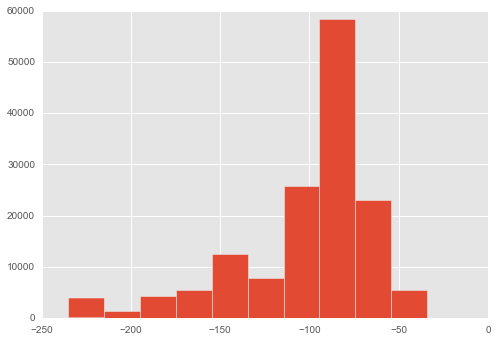

In [132]:
inner_data['Y'].map(lambda x: -float(str(x).replace(",","."))/10000).hist()

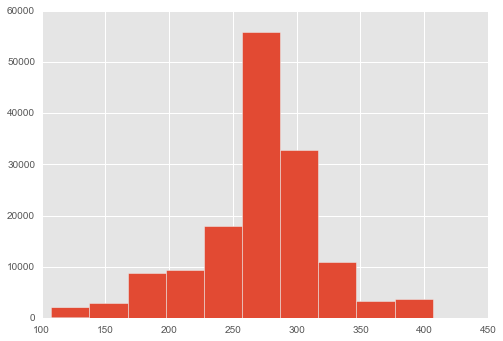

In [133]:
inner_data['X'].map(lambda x: float(str(x).replace(",","."))/10000).hist()

/Users/luis/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


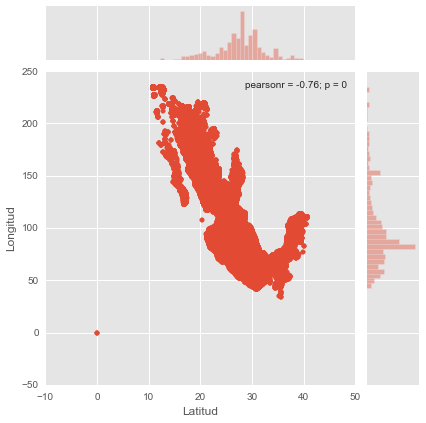

In [134]:
sns.jointplot(x='Latitud', y='Longitud', data=XY)

/Users/luis/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


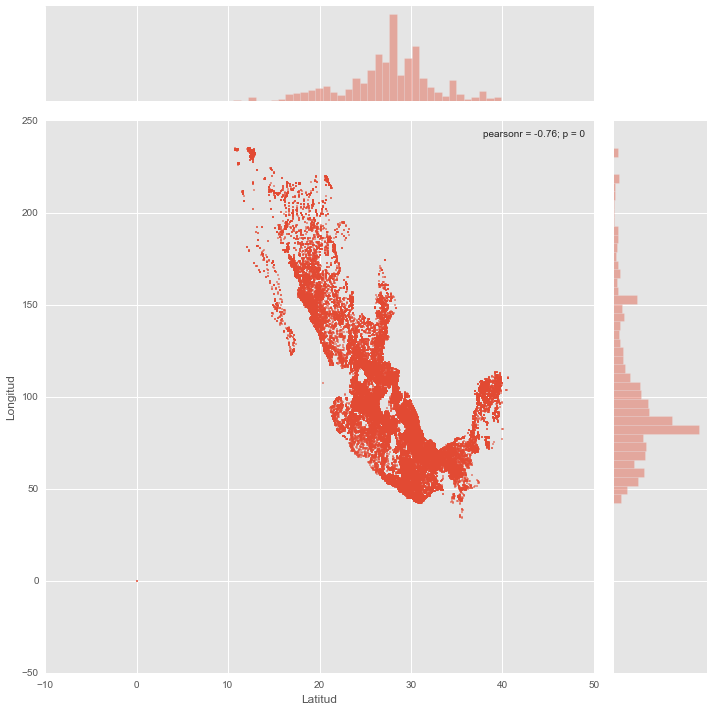

In [135]:
sns.jointplot(x='Latitud', y='Longitud', data=XY, size=10, ratio=5,s=1)

In [136]:
XY.head()

,Latitud,Longitud
0,28.034619,85.692449
1,28.026875,85.679924
2,27.992703,84.988437
3,27.992288,85.114371
4,27.994609,84.962842


In [137]:
diferencias = ((loc['LATITUD_CARGA'].map(lambda x: float(str(x).replace(",",".")))- loc['X'].map(lambda x: float(str(x).replace(",","."))))**2+(loc['LONGITUD_CARGA'].map(lambda x: float(str(x).replace(",",".")))-loc['Y'].map(lambda x: float(str(x).replace(",","."))))**2).map(lambda x: sqrt(x))

In [138]:
x1 = loc['LATITUD_CARGA'].map(lambda x: float(str(x).replace(",",".")))
x2 = loc['X'].map(lambda x: float(str(x).replace(",",".")))
y1 = loc['LONGITUD_CARGA'].map(lambda x: float(str(x).replace(",",".")))
y2 = loc['Y'].map(lambda x: float(str(x).replace(",",".")))

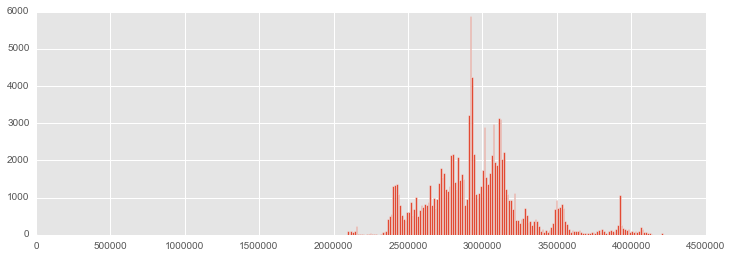

In [139]:
plt.figure(figsize=(12,4))
diferencias.hist(bins = int(sqrt(len(diferencias))))

In [140]:
def heaversine(x1,y1,x2,y2):
    a = sin((x2-x1)/2)**2+cos(x1)*cos(x2)*sin((y2-y1)/2)**2
    c = 2*atan2(sqrt(a),sqrt(1-a))
    return 6371*c

In [141]:
vals=loc[['LATITUD_CARGA', 'LONGITUD_CARGA','X']].groupby(['LATITUD_CARGA', 'LONGITUD_CARGA']).count()['X'].values

In [142]:
vals = pd.DataFrame(vals)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112a6ef98>]], dtype=object)

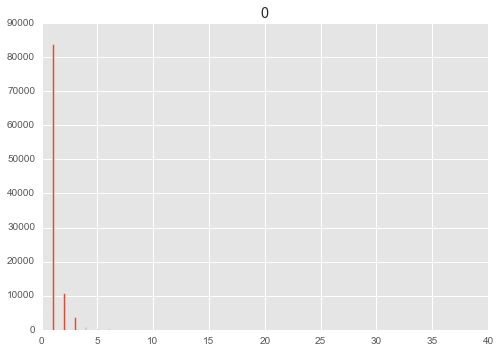

In [143]:
vals.hist(bins=320)

In [144]:
data = pd.DataFrame({'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2})

In [145]:
distancias_transformadas = data.apply(lambda s: heaversine(s['x1'],s['y1'],s['x2'],s['y2']),axis=1)

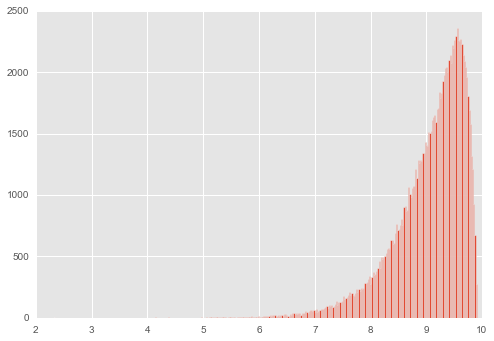

In [146]:
distancias_transformadas.map(lambda x:log(x)).hist(bins=int(sqrt(len(distancias_transformadas))))

In [147]:
inner_data = pd.read_csv('inner_data.csv')

/Users/luis/anaconda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
secciones = ['seccion_1', 'seccion_2', 'seccion_3', 'seccion_4', 'seccion_5', 'seccion_6', 'seccion_7', 'seccion_8', 'seccion_9']
resumen = ['ENT']
resumen.extend(secciones)
resumen.extend(['cal_final'])
indicadores = ['seccion_1', 'seccion_2', 'seccion_3', 'seccion_4', 'seccion_5', 'seccion_6', 'seccion_7', 'seccion_8', 'seccion_9', 'cal_final']

In [195]:
inner_data

,Unnamed: 0,ENT,MUN,LOC,AGEB,MZA,ID_INM,seccion_1,seccion_2,seccion_3,seccion_4,seccion_5,seccion_6,seccion_7,seccion_8,seccion_9,X,Y,cal_final
0,24,2,4,1,3412,2,1772,11,12.0,11,5.5,11.75,4.30,0,7.2,4,1084889.4391,2344929.5143,0.6675
1,72829,2,4,1,3412,2,2473,8,12.0,11,0.0,11.75,2.90,0,9.6,4,1084889.4391,2344929.5143,0.5925
2,105,2,4,1,436A,14,1886,11,12.0,12,5.5,11.45,3.00,0,8.4,4,1081038.1387,2346568.3414,0.6735
3,72827,2,4,1,436A,14,2471,11,9.0,12,0.0,14.00,5.60,0,8.4,4,1081038.1387,2346568.3414,0.6400
4,122,2,4,1,3041,2,1905,11,9.0,11,5.5,11.75,3.80,0,7.2,4,1077173.8573,2346448.7400,0.6325
5,129,2,4,1,3713,48,1992,11,11.5,9,0.0,8.35,2.70,0,7.2,8,1079930.4474,2343442.2052,0.5775
6,129,2,4,1,3713,48,1992,11,11.5,9,0.0,8.35,2.70,0,7.2,8,1079946.8545,2343442.1063,0.5775
7,129,2,4,1,3713,48,1992,11,11.5,9,0.0,8.35,2.70,0,7.2,8,1079895.2853,2343442.4170,0.5775
8,130,2,4,1,3713,48,1993,11,10.0,12,0.0,11.75,3.80,0,8.4,8,1079930.4474,2343442.2052,0.6495
9,130,2,4,1,3713,48,1993,11,10.0,12,0.0,11.75,3.80,0,8.4,8,1079946.8545,2343442.1063,0.6495


In [149]:
x=300
tmp_data = inner_data[['ENT', 'seccion_1', 'seccion_2', 'seccion_3', 'seccion_4', 'seccion_5', 'seccion_6', 'seccion_7', 'seccion_8', 'seccion_9']]

In [203]:
#plt.scatter([1, 2, 3, 4, 5, 6, 7, 8, 9], tmp_data['ENT'].values, s=tmp_data.ix[x:x+9][secciones].apply(lambda x: 10*x))
#tmp_data.groupby(['ENT']).quantile(0.99)
calificaciones = inner_data[secciones].sum(axis=1)

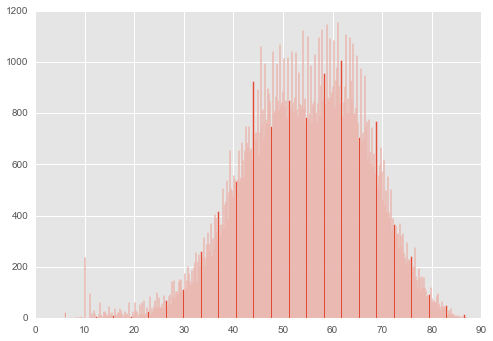

In [211]:
calificaciones.hist(bins=int(sqrt(calificaciones.count())))

In [212]:
inner_data['cal_final'] = calificaciones

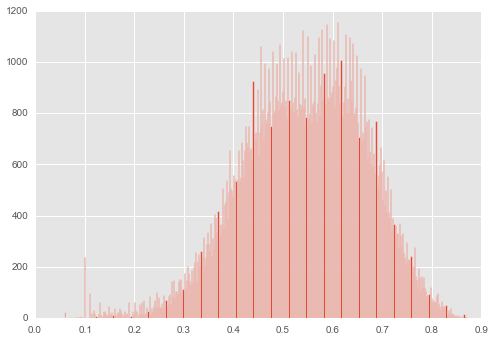

In [178]:
inner_data['cal_final'].hist(bins = int(sqrt(len(calificaciones))))

In [238]:
inner_agg = inner_data[resumen].groupby(['ENT']).agg('mean')[secciones]
inner_agg_median = inner_data[resumen].groupby(['ENT']).agg('median')[secciones]

calificaciones = inner_agg[secciones].sum(axis=1)/100
calificaciones_median = inner_agg_median[secciones].sum(axis=1)/100

for i in inner_agg.index.values:
    inner_agg.ix[i]=inner_agg.ix[i]/max_vals
inner_agg['cal_final'] = calificaciones

for i in inner_agg_median.index.values:
    inner_agg_median.ix[i]=inner_agg_median.ix[i]/max_vals
inner_agg_median['cal_final'] = calificaciones

/Users/luis/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x120b21cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x120b2e668>,
 'fliers': [<matplotlib.lines.Line2D at 0x120b32e10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x120b320b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x120b28668>,
  <matplotlib.lines.Line2D at 0x120d2ed68>]}

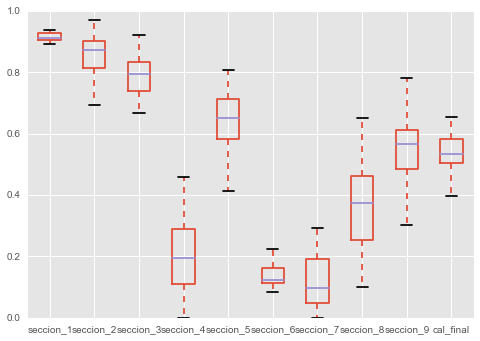

In [247]:
inner_agg.boxplot()

In [202]:
tmp_sum=inner_agg.sum(axis=1)
tmp_sum

ENT
2     5.462742
3     5.303114
4     4.567306
5     5.925606
6     5.262592
7     3.316895
8     4.484446
9     5.546940
10    4.422440
11    4.542022
12    3.887059
13    3.839614
14    4.649610
15    5.242571
16    4.482073
18    5.550203
19    5.260497
20    3.359407
21    4.678407
23    4.127940
24    4.212829
25    4.519968
26    5.013343
27    4.457016
29    3.644955
30    4.311153
31    4.746783
32    4.288673
dtype: float64

In [9]:
max_vals = np.array([11, 13, 13, 11, 14, 17, 2, 11, 8])

In [197]:
new_names = dict(zip(secciones,['1', '2', '3', '4', '5', '6', '7', '8', '9']))
inner_agg = inner_agg.rename(columns = new_names)


In [198]:
for i in inner_agg.index.values:
    inner_agg.ix[i]=inner_agg.ix[i]/max_vals

In [5]:
inner_data = pd.read_csv('inner_data.csv')
inner_data

/Users/luis/anaconda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,ENT,MUN,LOC,AGEB,MZA,ID_INM,seccion_1,...,seccion_3,seccion_4,seccion_5,seccion_6,seccion_7,seccion_8,seccion_9,X,Y,cal_final
0,0,24,24,2,4,1,3412,2,1772,1.000000,...,0.846154,0.5,0.839286,0.252941,0,0.654545,0.5,1084889.4391,2344929.5143,0.6675
1,1,72829,72829,2,4,1,3412,2,2473,0.727273,...,0.846154,0.0,0.839286,0.170588,0,0.872727,0.5,1084889.4391,2344929.5143,0.5925
2,2,105,105,2,4,1,436A,14,1886,1.000000,...,0.923077,0.5,0.817857,0.176471,0,0.763636,0.5,1081038.1387,2346568.3414,0.6735
3,3,72827,72827,2,4,1,436A,14,2471,1.000000,...,0.923077,0.0,1.000000,0.329412,0,0.763636,0.5,1081038.1387,2346568.3414,0.6400
4,4,122,122,2,4,1,3041,2,1905,1.000000,...,0.846154,0.5,0.839286,0.223529,0,0.654545,0.5,1077173.8573,2346448.7400,0.6325
5,5,129,129,2,4,1,3713,48,1992,1.000000,...,0.692308,0.0,0.596429,0.158824,0,0.654545,1.0,1079930.4474,2343442.2052,0.5775
6,6,129,129,2,4,1,3713,48,1992,1.000000,...,0.692308,0.0,0.596429,0.158824,0,0.654545,1.0,1079946.8545,2343442.1063,0.5775
7,7,129,129,2,4,1,3713,48,1992,1.000000,...,0.692308,0.0,0.596429,0.158824,0,0.654545,1.0,1079895.2853,2343442.4170,0.5775
8,8,130,130,2,4,1,3713,48,1993,1.000000,...,0.923077,0.0,0.839286,0.223529,0,0.763636,1.0,1079930.4474,2343442.2052,0.6495
9,9,130,130,2,4,1,3713,48,1993,1.000000,...,0.923077,0.0,0.839286,0.223529,0,0.763636,1.0,1079946.8545,2343442.1063,0.6495


In [184]:
inner_agg['total'] = tmp_sum

In [185]:
inner_agg

,1,2,3,4,5,6,7,8,9,total
ENT,,,,,,,,,,
2,0.905273,0.792511,0.788793,0.395282,0.753682,0.200733,0.218067,0.626755,0.781646,0.624107
3,0.911422,0.878856,0.830533,0.457436,0.720168,0.162555,0.291282,0.431375,0.619487,0.604089
4,0.927649,0.932916,0.760286,0.257106,0.581848,0.120410,0.114341,0.384056,0.488695,0.535996
5,0.793792,0.969043,0.911820,0.414634,0.806794,0.179412,0.658537,0.459867,0.731707,0.643183
6,0.933566,0.933925,0.876726,0.333333,0.734249,0.159766,0.282051,0.534615,0.474359,0.607096
7,0.852880,0.622362,0.585957,0.092025,0.412869,0.117713,0.034619,0.290845,0.307625,0.396129
8,0.891406,0.783828,0.738228,0.254687,0.662540,0.153636,0.108175,0.293837,0.598110,0.525146
9,0.903780,0.954153,0.903672,0.290823,0.789570,0.239824,0.184403,0.796426,0.484288,0.654271
10,0.933088,0.829115,0.769643,0.241010,0.655383,0.113312,0.118210,0.178135,0.584545,0.516729


/Users/luis/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


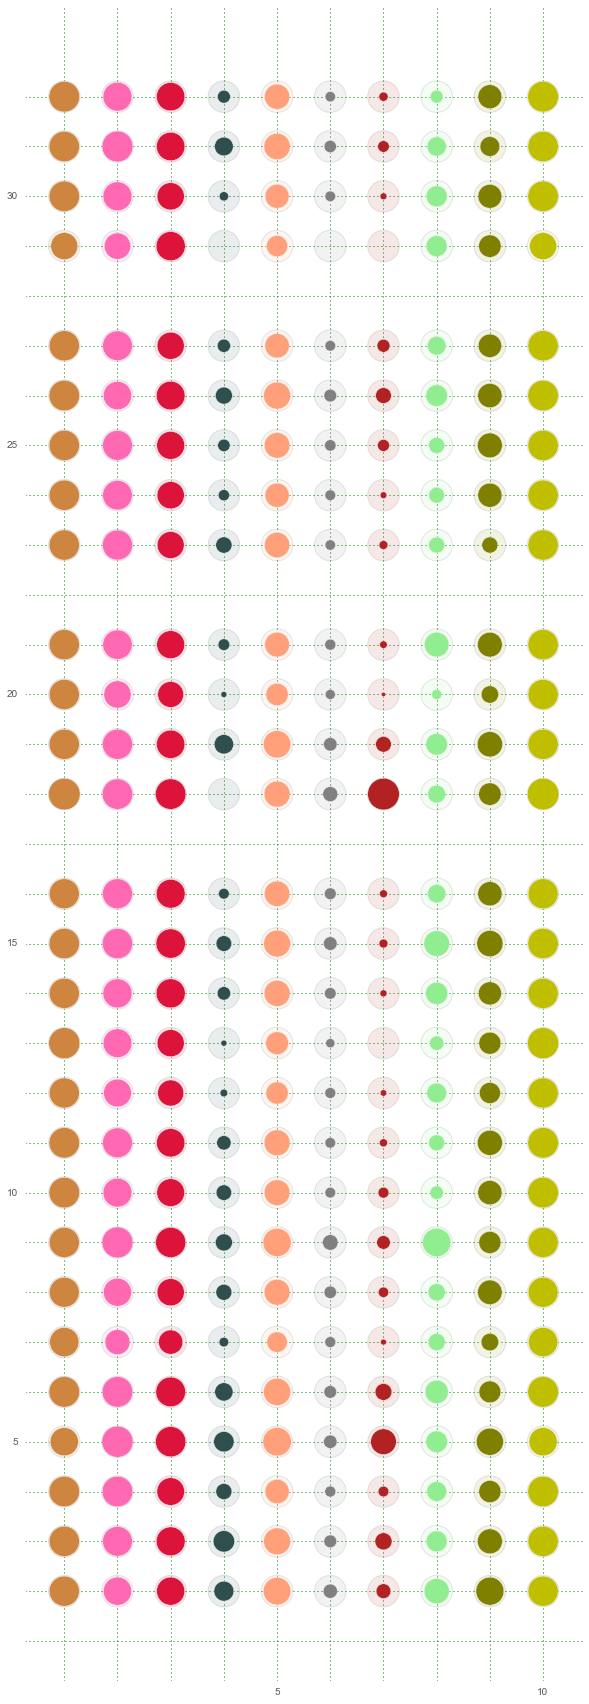

In [219]:
coef = 1000
#COLORS
colors = ['peru', 'hotpink', 'crimson', 'darkslategray', 'lightsalmon', 'gray', 'firebrick', 'lightgreen', 'olive', 'y']
#colors = [[color[0]]*9, [color[1]]*9, [color[2]]*9 ]
#for i in range(3):
#    colors[i].extend('y')
#GRID
fig = plt.figure(figsize=(10,30))
ax = fig.add_subplot(1,1,1)
ax.set_axis_bgcolor('white')

major_yticks = np.arange(0, 33, 5)
ax.set_yticks(major_yticks)                                           
major_xticks = np.arange(0, 11, 5)
ax.set_xticks(major_xticks)


minor_yticks = np.arange(0, 33, 1)
ax.set_yticks(minor_yticks, minor=True)                                           
minor_xticks = np.arange(0, 11, 1)
ax.set_xticks(minor_xticks, minor=True)



#ax.grid(which='major', c = 'white', linestyle='-')
ax.grid(which='minor', c = 'green', linestyle=':')


for i in inner_agg.index.values:
    plt.scatter(range(1,11),[i]*10, s=coef, c = colors, alpha=0.1, edgecolor='k', lw=1)
    plt.scatter(range(1,11), [i]*10, s=inner_agg.ix[i].map(lambda x: coef*x), c = colors)
plt.savefig('bubble_plot.png', bbox_inches='tight')
plt.show()

In [220]:
inner_agg['total'].plot()

KeyError: 'total'

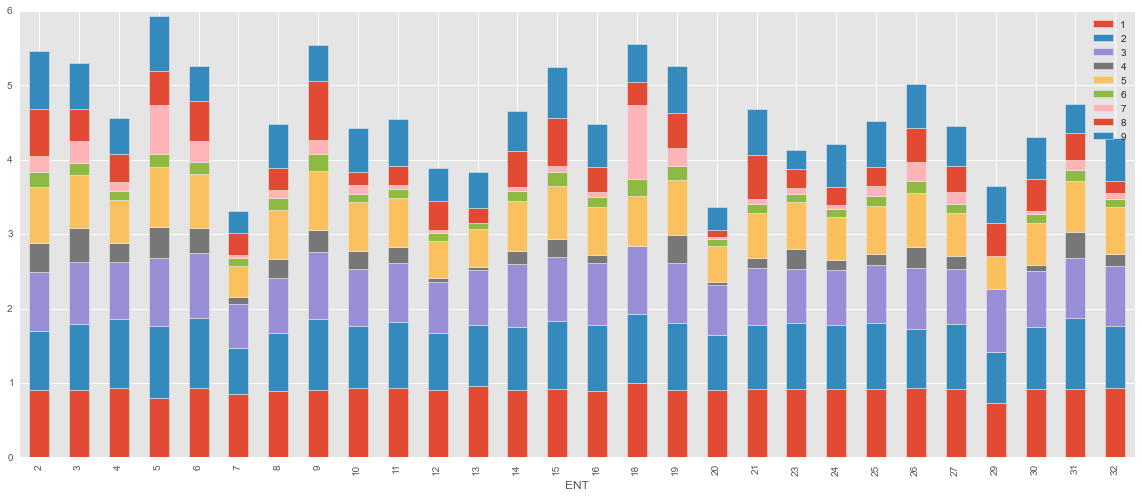

In [221]:
inner_agg.plot(figsize=(20,8), kind='bar', stacked=True)

In [164]:
fig=plt.figure()

In [127]:
ax

In [150]:
minor_xticks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [2]:
inner_data = pd.read_csv('inner_data.csv')

/Users/luis/anaconda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [222]:
inner_agg

,1,2,3,4,5,6,7,8,9
ENT,,,,,,,,,
2,0.905273,0.792511,0.788793,0.395282,0.753682,0.200733,0.218067,0.626755,0.781646
3,0.911422,0.878856,0.830533,0.457436,0.720168,0.162555,0.291282,0.431375,0.619487
4,0.927649,0.932916,0.760286,0.257106,0.581848,0.120410,0.114341,0.384056,0.488695
5,0.793792,0.969043,0.911820,0.414634,0.806794,0.179412,0.658537,0.459867,0.731707
6,0.933566,0.933925,0.876726,0.333333,0.734249,0.159766,0.282051,0.534615,0.474359
7,0.852880,0.622362,0.585957,0.092025,0.412869,0.117713,0.034619,0.290845,0.307625
8,0.891406,0.783828,0.738228,0.254687,0.662540,0.153636,0.108175,0.293837,0.598110
9,0.903780,0.954153,0.903672,0.290823,0.789570,0.239824,0.184403,0.796426,0.484288
10,0.933088,0.829115,0.769643,0.241010,0.655383,0.113312,0.118210,0.178135,0.584545


In [41]:
#inner_data['seccion_1'].replace({1:11, 2:8, 3:3, 4:0, 5:0},inplace=True)

In [227]:
inner_agg['cal_final'] = inner_data['cal_final']/100

In [228]:
inner_agg

,1,2,3,4,5,6,7,8,9,cal_final
ENT,,,,,,,,,,
2,0.905273,0.792511,0.788793,0.395282,0.753682,0.200733,0.218067,0.626755,0.781646,0.6735
3,0.911422,0.878856,0.830533,0.457436,0.720168,0.162555,0.291282,0.431375,0.619487,0.6400
4,0.927649,0.932916,0.760286,0.257106,0.581848,0.120410,0.114341,0.384056,0.488695,0.6325
5,0.793792,0.969043,0.911820,0.414634,0.806794,0.179412,0.658537,0.459867,0.731707,0.5775
6,0.933566,0.933925,0.876726,0.333333,0.734249,0.159766,0.282051,0.534615,0.474359,0.5775
7,0.852880,0.622362,0.585957,0.092025,0.412869,0.117713,0.034619,0.290845,0.307625,0.5775
8,0.891406,0.783828,0.738228,0.254687,0.662540,0.153636,0.108175,0.293837,0.598110,0.6495
9,0.903780,0.954153,0.903672,0.290823,0.789570,0.239824,0.184403,0.796426,0.484288,0.6495
10,0.933088,0.829115,0.769643,0.241010,0.655383,0.113312,0.118210,0.178135,0.584545,0.6495


In [11]:
inner_normalized = inner_data[resumen]
#inner_normalized[secciones] = inner_normalized[secciones]/max_vals
#inner_normalized['cal_final'] = inner_normalized['cal_final']/100
inner_normalized

,ENT,seccion_1,seccion_2,seccion_3,seccion_4,seccion_5,seccion_6,seccion_7,seccion_8,seccion_9,cal_final
0,2,1.000000,0.923077,0.846154,0.5,0.839286,0.252941,0,0.654545,0.5,0.6675
1,2,0.727273,0.923077,0.846154,0.0,0.839286,0.170588,0,0.872727,0.5,0.5925
2,2,1.000000,0.923077,0.923077,0.5,0.817857,0.176471,0,0.763636,0.5,0.6735
3,2,1.000000,0.692308,0.923077,0.0,1.000000,0.329412,0,0.763636,0.5,0.6400
4,2,1.000000,0.692308,0.846154,0.5,0.839286,0.223529,0,0.654545,0.5,0.6325
5,2,1.000000,0.884615,0.692308,0.0,0.596429,0.158824,0,0.654545,1.0,0.5775
6,2,1.000000,0.884615,0.692308,0.0,0.596429,0.158824,0,0.654545,1.0,0.5775
7,2,1.000000,0.884615,0.692308,0.0,0.596429,0.158824,0,0.654545,1.0,0.5775
8,2,1.000000,0.769231,0.923077,0.0,0.839286,0.223529,0,0.763636,1.0,0.6495
9,2,1.000000,0.769231,0.923077,0.0,0.839286,0.223529,0,0.763636,1.0,0.6495


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c4a0ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112f72400>]], dtype=object)

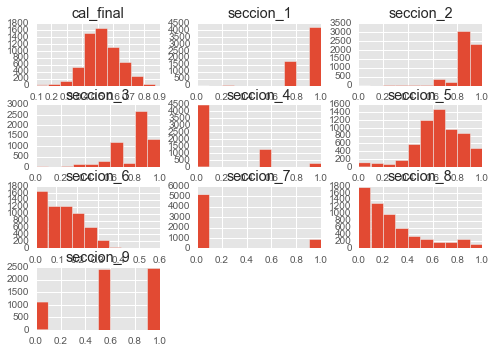

In [15]:
inner_normalized[inner_normalized['ENT']==25][indicadores].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112fadc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11451e240>]], dtype=object)

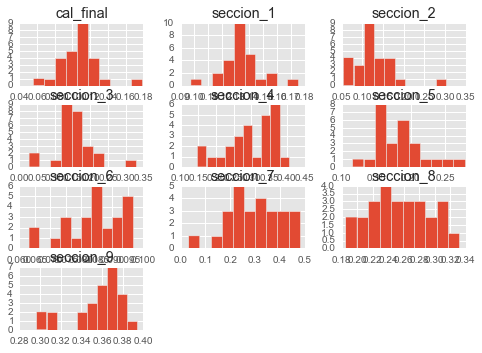

In [16]:
inner_normalized.groupby('ENT').agg('std').hist()

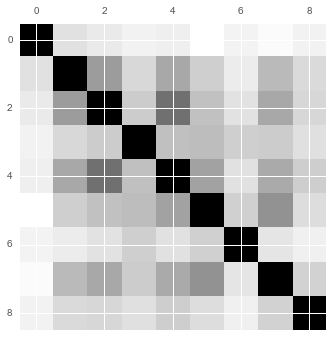

In [17]:
plt.matshow(inner_normalized[secciones].corr())

In [18]:
import itertools

In [283]:
def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(8,8))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[x], data[y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c7c3b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1240bab70>]], dtype=object)

/Users/luis/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


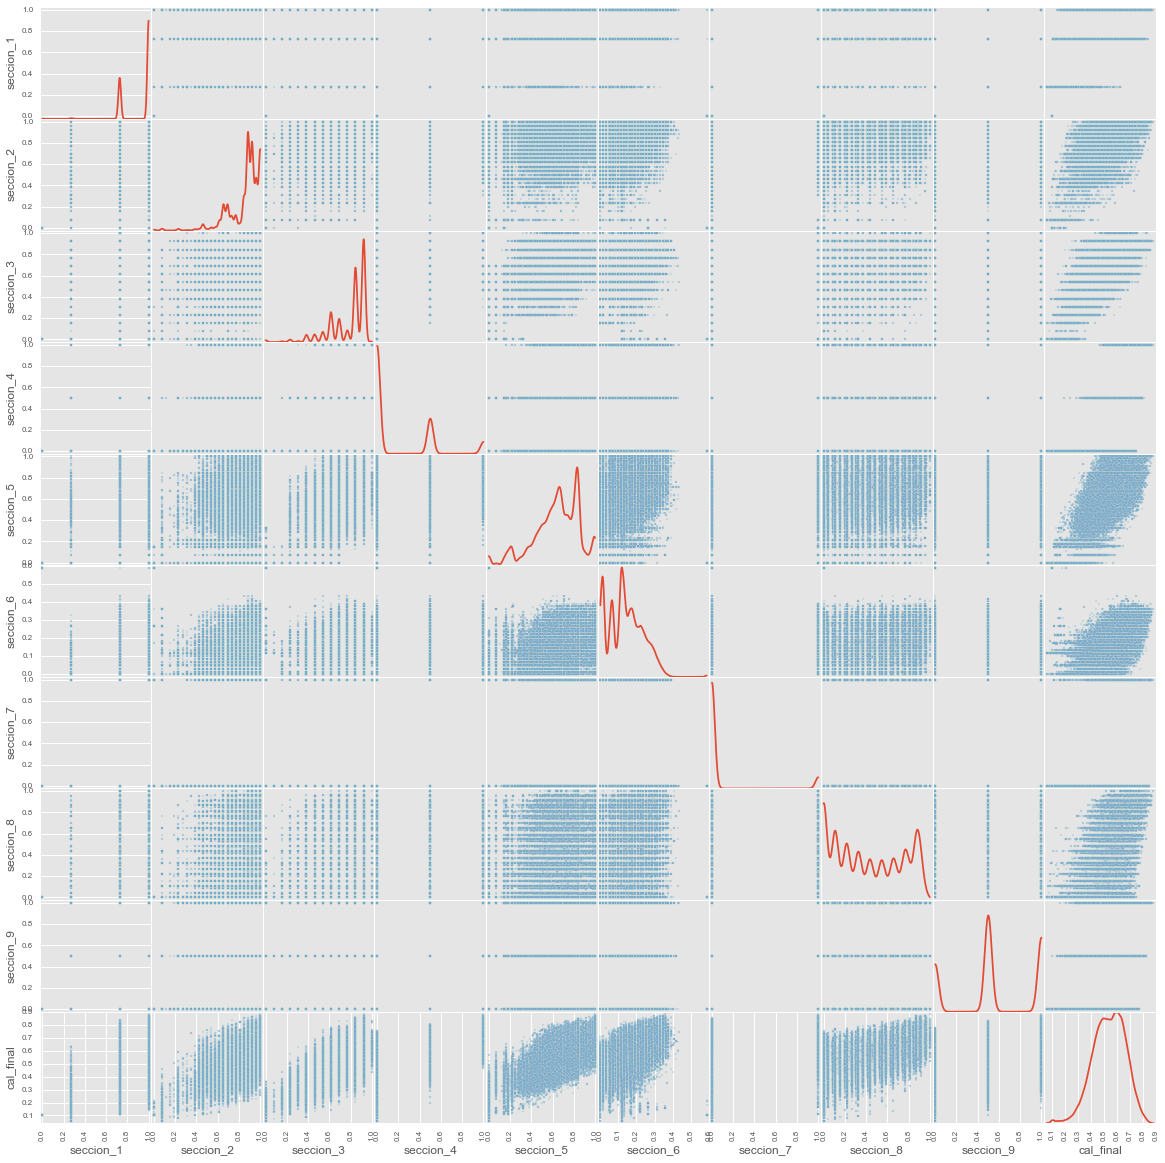

In [21]:
pd.scatter_matrix(inner_normalized[indicadores], alpha=0.2, figsize=(20, 20), diagonal='kde')

In [ ]:
pd.scatter_matrix(inner_normalized[indicadores], alpha=0.2, figsize=(6, 6), diagonal='kde')